## 02 - Orderbook Visualisation


Looking at the updates, inserts and deletes using data from bitmexOrderBook service.

The orderbook from BitMEX only contains the total limit order size at a given price level. 
Three commands are used: insert (creating a new order size at a price level), update (updating a size),
and delete (removing all orders at a price level).

The ways orders are inserted, updated or deleted are interesting, and some patterns can be found.

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

import pymongo
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# Connect to mongodb database
mongoClient = pymongo.MongoClient("mongodb://localhost:27017/")
db = mongoClient.bitmexOrderBook

# Create references to collections
deleteCollection = db.ob_delete
insertCollection = db.ob_insert
updateCollection = db.ob_update
quotesCollection = db.quotes

### Quotes Utils

In [17]:
quotesAll = list(quotesCollection.find({}))

quotesDF = pd.DataFrame.from_records(quotesAll)
quotesDF["spread"] = quotesDF.askPrice - quotesDF.bidPrice
quotesDF['imbalance'] = quotesDF.askSize - quotesDF.bidSize

### Inserts

In [18]:
inserts = list(insertCollection.find({}))

insertsDF = pd.DataFrame.from_records(inserts)

print(insertsDF.describe())

          timestamp          price          size
count  1.944000e+03    1944.000000  1.944000e+03
mean   1.578861e+09   11645.926955  6.775728e+03
std    1.149918e+03    6852.609041  1.281990e+05
min    1.578859e+09      23.500000  1.000000e+00
25%    1.578860e+09    8141.500000  2.700000e+01
50%    1.578861e+09   11419.500000  1.810000e+02
75%    1.578862e+09   14794.000000  5.150000e+02
max    1.578863e+09  248152.000000  4.692484e+06


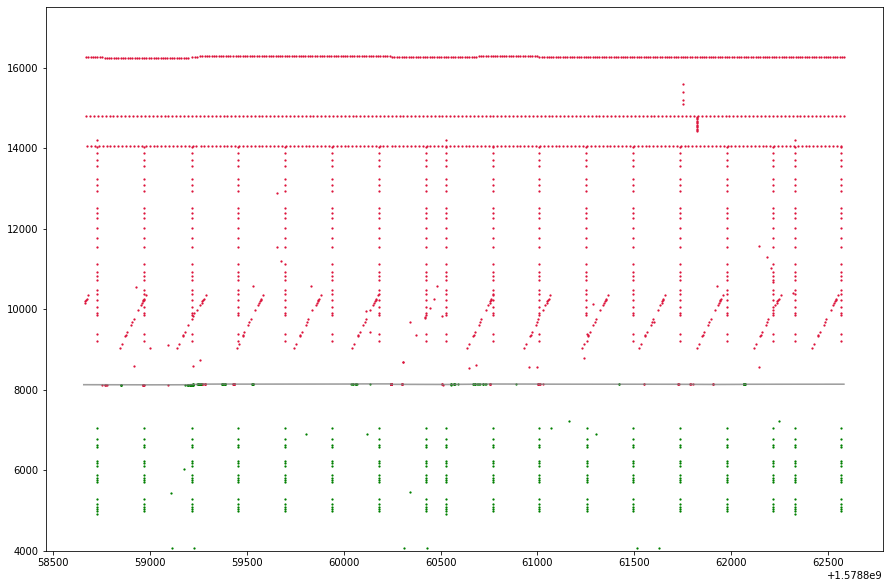

In [23]:
fig = plt.figure()
ax = plt.axes()

plt.plot(quotesDF.timestamp, quotesDF.bidPrice, color='gray', alpha=0.5)
plt.plot(quotesDF.timestamp, quotesDF.askPrice, color='gray', alpha=0.5)

sellInserts = insertsDF[insertsDF['side'] == "Sell"]
buyInserts = insertsDF[insertsDF['side'] == "Buy"]

plt.scatter(sellInserts.timestamp, sellInserts.price, s=1.5, alpha=1, c='crimson')
plt.scatter(buyInserts.timestamp, buyInserts.price, s=1.5, alpha=1, c='green')


plt.ylim(4000, 17500)

plt.show()

### Deletes

In [21]:
deletes = list(deleteCollection.find({}))

deletesDF = pd.DataFrame.from_records(deletes)

print(deletesDF.describe())

          timestamp         price
count  1.951000e+03   1951.000000
mean   1.578861e+09  11454.026397
std    1.165451e+03   3941.123854
min    1.578859e+09     23.500000
25%    1.578860e+09   8141.250000
50%    1.578861e+09  11121.000000
75%    1.578862e+09  14794.000000
max    1.578863e+09  81402.000000


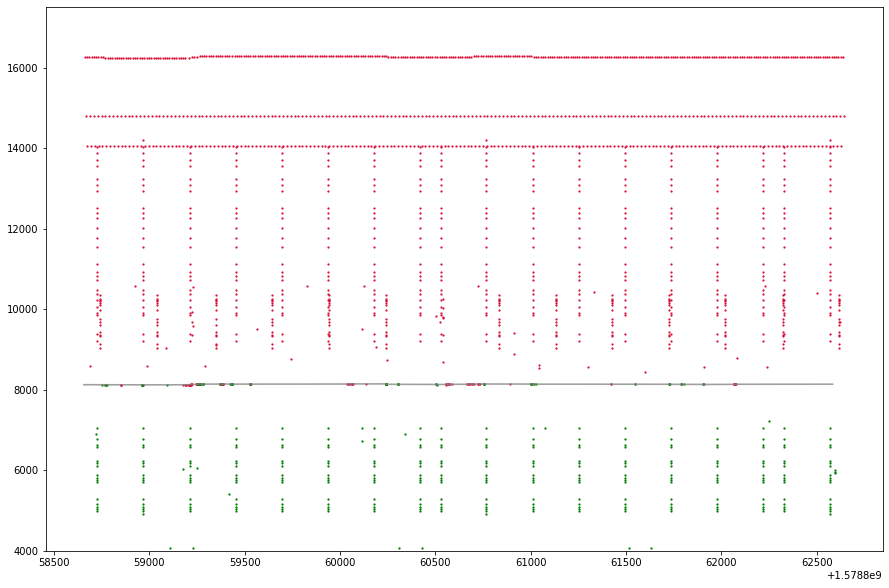

In [24]:
fig = plt.figure()
ax = plt.axes()

plt.plot(quotesDF.timestamp, quotesDF.bidPrice, color='gray', alpha=0.5)
plt.plot(quotesDF.timestamp, quotesDF.askPrice, color='gray', alpha=0.5)

sellDeletes = deletesDF[deletesDF['side'] == "Sell"]
buyDeletes = deletesDF[deletesDF['side'] == "Buy"]

plt.scatter(sellDeletes.timestamp, sellDeletes.price, s=1.5, alpha=1, c='crimson')
plt.scatter(buyDeletes.timestamp, buyDeletes.price, s=1.5, alpha=1, c='green')


plt.ylim(4000, 17500)

plt.show()

### Deletes

In [25]:
updates = list(updateCollection.find({}))

updatesDF = pd.DataFrame.from_records(updates)

print(updatesDF.describe())

          timestamp          price          size
count  6.525850e+05  652585.000000  6.525850e+05
mean   1.578861e+09    8133.894368  4.029770e+05
std    1.179347e+03     255.900184  7.121721e+05
min    1.578859e+09    1823.500000  1.000000e+00
25%    1.578859e+09    8115.500000  7.455300e+04
50%    1.578860e+09    8134.000000  1.644310e+05
75%    1.578862e+09    8146.000000  4.098310e+05
max    1.578863e+09   16200.000000  2.024588e+07


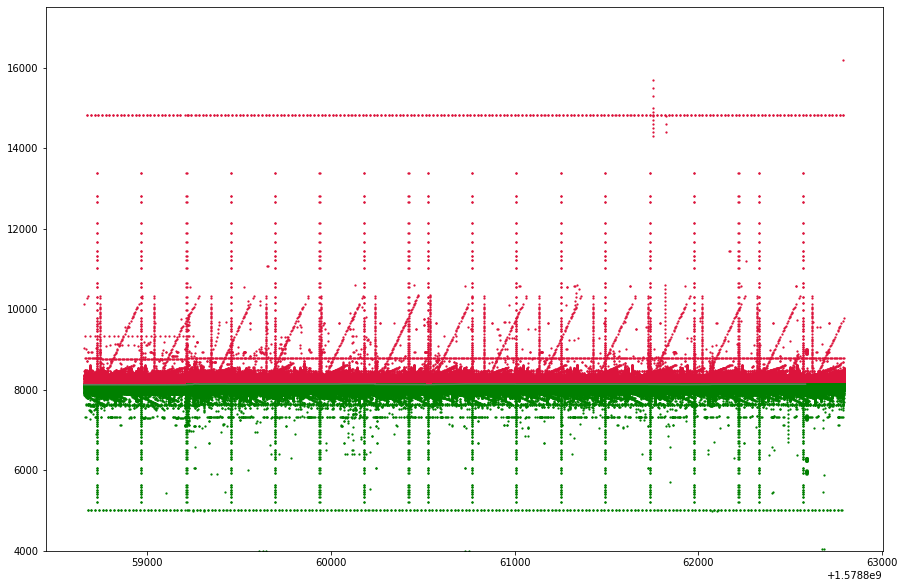

In [26]:
fig = plt.figure()
ax = plt.axes()

plt.plot(quotesDF.timestamp, quotesDF.bidPrice, color='gray', alpha=0.5)
plt.plot(quotesDF.timestamp, quotesDF.askPrice, color='gray', alpha=0.5)

sellUpdates = updatesDF[updatesDF['side'] == "Sell"]
buyUpdates = updatesDF[updatesDF['side'] == "Buy"]

plt.scatter(sellUpdates.timestamp, sellUpdates.price, s=1.5, alpha=1, c='crimson')
plt.scatter(buyUpdates.timestamp, buyUpdates.price, s=1.5, alpha=1, c='green')


plt.ylim(4000, 17500)

plt.show()

### Understanding orderbook changes

Viewing updates using the levels size as a third dimension, color. Sizes are normalised between 0 (blue) and 1 million (dark red). 

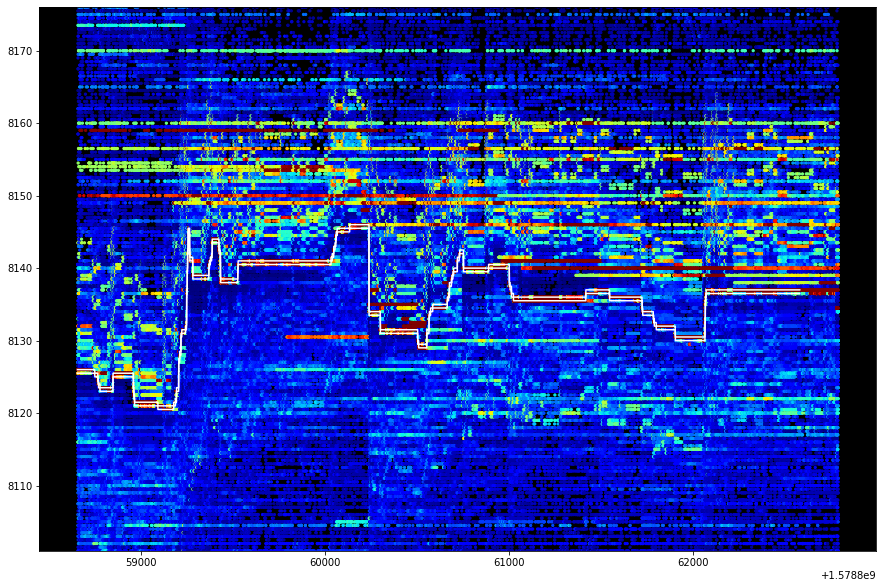

In [30]:
import matplotlib.colors as colors

fig = plt.figure()
ax = plt.axes()

ax.set_facecolor('black')

colormap = plt.cm.jet #or any other colormap
normalize = colors.Normalize(vmin=0, vmax=1000000)

plt.scatter(updatesDF.timestamp, updatesDF.price,c =updatesDF['size'], s=5, cmap=colormap, norm=normalize, marker='o')


plt.plot(quotesDF.timestamp, quotesDF.bidPrice, color='white', alpha=1)
plt.plot(quotesDF.timestamp, quotesDF.askPrice, color='white', alpha=1)

plt.ylim(quotesDF.askPrice.min() - 20, quotesDF.askPrice.max() + 30)


plt.show()